<a href="https://colab.research.google.com/github/JoaoGuilherme08/Mini-ChatGPT/blob/main/Mini_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@markdown **NVIDIA GPU**
import subprocess
sub_p_res = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total,memory.free', '--format=csv,noheader'], stdout=subprocess.PIPE).stdout.decode('utf-8')
print(sub_p_res)

# Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

#Test

In [ ]:
print(tf.test.is_gpu_available())

#Import download texts

In [ ]:
import requests
# Download and preprocess the data from the URL
response = requests.get("https://www.gutenberg.org/files/55/55-0.txt")
wizard_of_oz = response.text

In [ ]:
start_text = "*** START OF THE PROJECT GUTENBERG EBOOK THE WONDERFUL WIZARD OF OZ ***"
# Find the index where the start_text occurs
start_index = wizard_of_oz.find(start_text) + 28

# Extract the text after the start_text
wizard_of_oz = wizard_of_oz[start_index + len(start_text):]
print(wizard_of_oz[:250] + "...")

In [ ]:
end_text = "*** END OF THE PROJECT GUTENBERG EBOOK THE WONDERFUL WIZARD OF OZ ***"

# Find the index where the end_text occurs
end_index = wizard_of_oz.find(end_text)

# Extract the text before the end_text
wizard_of_oz = wizard_of_oz[:end_index]

# show the final of the text
print(wizard_of_oz[-200:])

In [ ]:
# Preprocess the data
sentences = wizard_of_oz.split(".")
sentences = [s.strip() for s in sentences if len(s) > 0]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Create input-output sequences
input_sequences = []
for sentence in sentences:
    seq = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(seq)):
        n_gram_seq = seq[:i+1]
        input_sequences.append(n_gram_seq)

In [ ]:
# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')


In [ ]:
# Split input-output sequences into input (X) and output (y)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [ ]:
# Convert y to categorical labels
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=max_seq_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Print the model summary
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X, y, epochs=100, verbose=1)

#Function to generate sentence completion

In [ ]:
# Function to generate sentence completion
def complete_sentence(model, tokenizer, initial_text, max_length=20):
    input_text = initial_text
    for _ in range(max_length):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        encoded_text = pad_sequences([encoded_text], maxlen=max_seq_len-1, padding='pre')
        predicted_probabilities = model.predict(encoded_text, verbose=0)[0]
        predicted_index = tf.argmax(predicted_probabilities, axis=-1).numpy()
        predicted_word = tokenizer.index_word[predicted_index]
        input_text += " " + predicted_word
        if predicted_word == '.':
            break
    return input_text + "..."

#Generate a completed sentence

In [ ]:
# Generate a completed sentence
completed_sentence = complete_sentence(model, tokenizer, "Uncle Henry never laughed", max_length=10)
print(completed_sentence)

In [ ]:
# Generate a completed sentence
completed_sentence = complete_sentence(model, tokenizer, "While she stood looking", max_length=10)
print(completed_sentence)

In [ ]:
# Generate a completed sentence
completed_sentence = complete_sentence(model, tokenizer, "The little old woman took the slate from her nose", max_length=10)
print(completed_sentence)

## Salvar Modelo

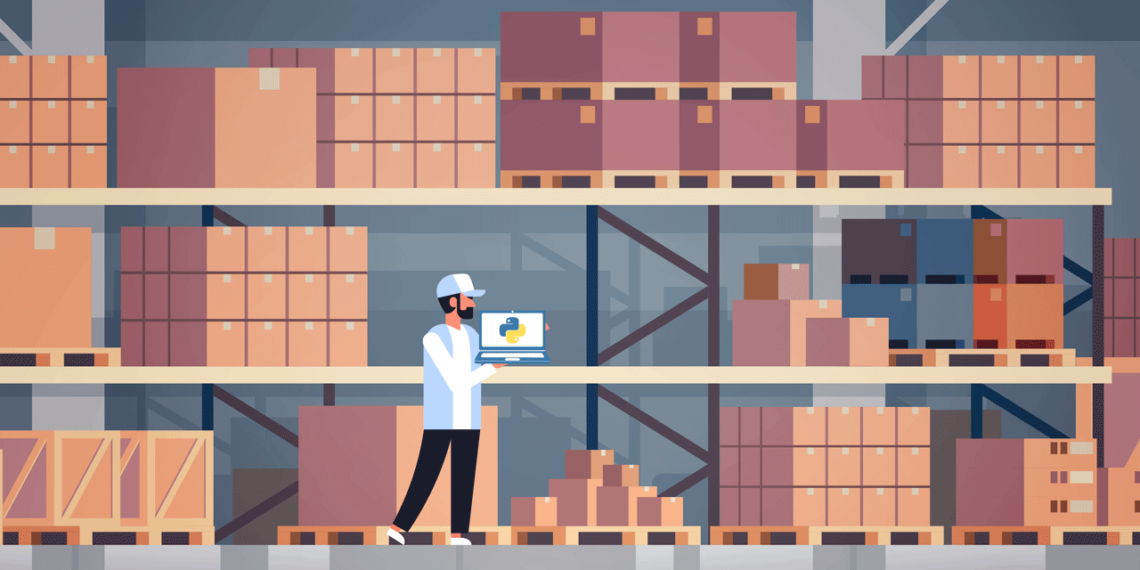

In [ ]:
model.save('chat_book.h5')

## -- USING MODEL SAVE

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from keras.models import load_model

model = load_model('chat_book.h5')

In [ ]:
import requests
# Download and preprocess the data from the URL
response = requests.get("https://www.gutenberg.org/files/55/55-0.txt")
wizard_of_oz = response.text

In [ ]:
start_text = "*** START OF THE PROJECT GUTENBERG EBOOK THE WONDERFUL WIZARD OF OZ ***"
# Find the index where the start_text occurs
start_index = wizard_of_oz.find(start_text) + 28

# Extract the text after the start_text
wizard_of_oz = wizard_of_oz[start_index + len(start_text):]
print(wizard_of_oz[:250] + "...")

In [ ]:
end_text = "*** END OF THE PROJECT GUTENBERG EBOOK THE WONDERFUL WIZARD OF OZ ***"

# Find the index where the end_text occurs
end_index = wizard_of_oz.find(end_text)

# Extract the text before the end_text
wizard_of_oz = wizard_of_oz[:end_index]

# show the final of the text
print(wizard_of_oz[-200:])

In [ ]:
# Preprocess the data
sentences = wizard_of_oz.split(".")
sentences = [s.strip() for s in sentences if len(s) > 0]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Create input-output sequences
input_sequences = []
for sentence in sentences:
    seq = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(seq)):
        n_gram_seq = seq[:i+1]
        input_sequences.append(n_gram_seq)

In [ ]:
# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')


In [ ]:
# Function to generate sentence completion
def complete_sentence(model, tokenizer, initial_text, max_length=20):
    input_text = initial_text
    for _ in range(max_length):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        encoded_text = pad_sequences([encoded_text], maxlen=max_seq_len-1, padding='pre')
        predicted_probabilities = model.predict(encoded_text, verbose=0)[0]
        predicted_index = tf.argmax(predicted_probabilities, axis=-1).numpy()
        predicted_word = tokenizer.index_word[predicted_index]
        input_text += " " + predicted_word
        if predicted_word == '.':
            break
    return input_text + "..."

In [ ]:
# Generate a completed sentence
completed_sentence = complete_sentence(model, tokenizer, "While she stood looking", max_length=10)
print(completed_sentence)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from translate import Translator

textoInput = widgets.Text(description='Prompt')
botao = widgets.Button(description='Enviar')

def translateToPt_text(text):
    translator = Translator(from_lang="en", to_lang="pt")
    translation = translator.translate(text)
    return translation

def translateToEn_text(text):
    translator = Translator(from_lang="pt", to_lang="en")
    translation = translator.translate(text)
    return translation

def enviar_clicado(botao):
    completed_sentence = complete_sentence(model, tokenizer, translateToEn_text(textoInput.value), max_length=10)
    traducao = translateToPt_text(completed_sentence)
    print(traducao)

botao.on_click(enviar_clicado)

display(textoInput, botao)